In [2]:
import os
import re
import sys
import sklearn as skl
import math

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import sklearn.cluster

import glob

from data_grid import DataGrid

from sklearn.decomposition import PCA

from sklearn.decomposition import NMF

from data_grid_TiNiSn import DataGrid, DataGrid_TiNiSn_500C, DataGrid_TiNiSn_600C

from Agglo_cluster import Agglo_cluster

from peak_removal import peak_rem

import dataproc.operations

from dataproc.operations.hitp import bayesian_block_finder
from dataproc.operations.peakShapes import voigtFn
from NMF import nmf_func

In [2]:
data_dir = "C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/"
regex = """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv"""
peakGrid = DataGrid(data_dir,regex)

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


In [3]:
dataGrid = DataGrid_TiNiSn_500C()

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully


In [4]:
data175 = dataGrid.get_data_array() 

(177, 800)


Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)


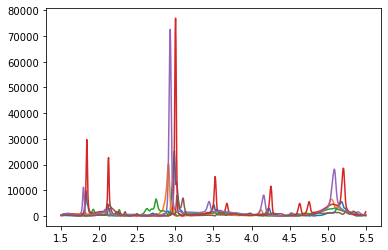

In [5]:
W,H = nmf_func(10)
fig,ax = plt.subplots()
for i in range(np.shape(W)[1]):
    ax.plot(dataGrid.data[1][:,0], W[:,i])

In [6]:
np.shape(W)

(800, 10)

In [7]:
np.shape(H)

(10, 177)

In [8]:
data_T=np.transpose(data175)

In [9]:
plt.figure?

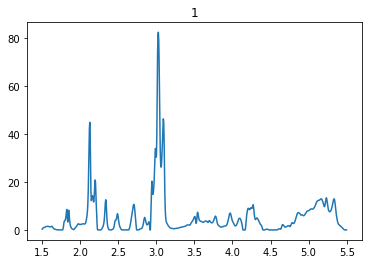

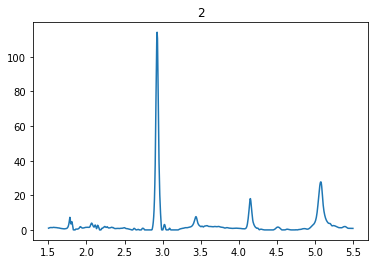

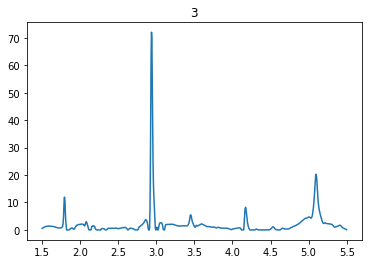

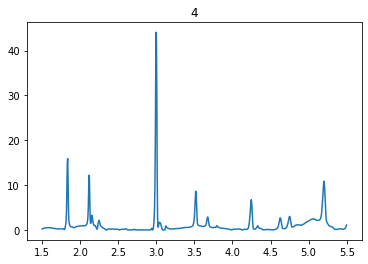

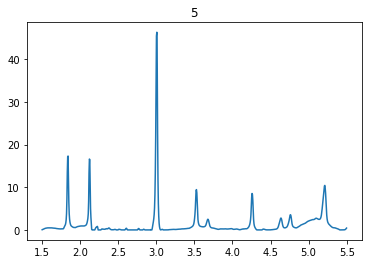

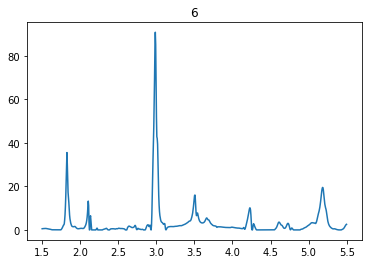

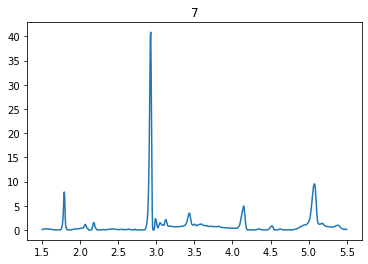

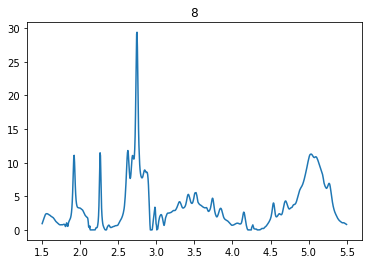

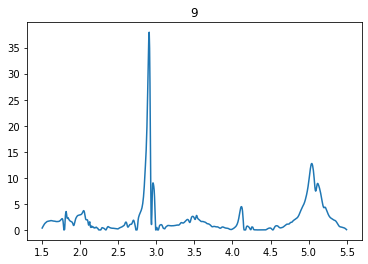

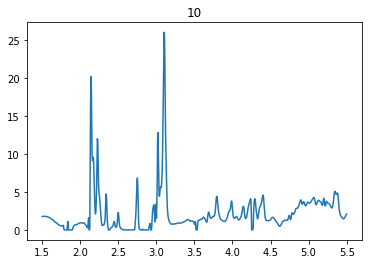

In [10]:
#fig, ax = plt.subplots(10)
for i in range(len(H)):
    #ax = fig.add_subplot(2,5,i+1)
    fig, ax = plt.subplots()
    ax.plot(dataGrid.data[1][:,0], W[:,i])
    ax.set_title(str(i+1))
    #ax.imshow(p)
    #ax.invert_yaxis()
    
    


#k=.03
#plt.subplots_adjust(left=k,right=(1-k),bottom=k,top=(1-k),wspace=k,hspace=k)
#plt.show()

In [11]:
(H[9][5])/max(H[9])

0.8553432774734786

In [47]:
def Get_grid(a):
    hues = [float(float(x)/float(10)) for x in range(1,10)]
    cluster_grid = np.zeros(shape = (15,15,3))
    for val in range(1,178):
        x,y = dataGrid.coord(val)
        cluster = (H[a][val-1])/max(H[a])
        
        cluster_grid[y-1][x-1] = matplotlib.colors.hsv_to_rgb([cluster,1,1])
        return cluster_grid

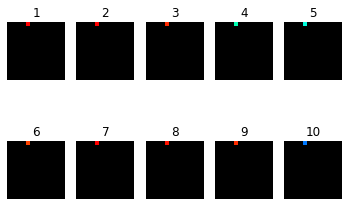

In [48]:
fig = plt.figure()
fig.tight_layout()
for i in range(0,10):
        cg = Get_grid(i)
        ax = fig.add_subplot(2,5,i+1)
        ax.imshow(cg)
        #ax.invert_yaxis()
        ax.title.set_text(i+1)
        ax.axis("off")

#k=.03
#plt.subplots_adjust(left=k,right=(1-k),bottom=k,top=(1-k),wspace=k,hspace=k)
#plt.savefig("/home/sasha/Desktop/Peak_Clustering_Images/clust-" + str(delta) + "-" + str(C) + ".png")
#plt.show()

In [14]:
matplotlib.colors.hsv_to_rgb([(H[9][5])/max(H[9]),1.0,1.0])

array([1.        , 0.        , 0.86794034])

(2, 2, 3)

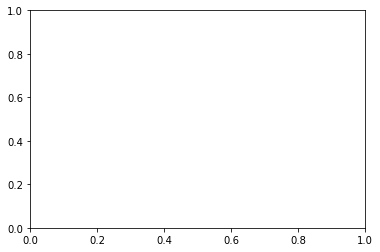

In [15]:
matplotlib.colors.is_color_like([1,1,1])
m = np.empty(shape=(2,2,3))
m[0,:,:]=[1,0.5,0.2],[0.5,0.6,0.6]
m[1,:,:] = [0.5,0.3,0.4],[1,1,1]
#pp = matplotlib.colors.to_rgb(m)
fig = plt.figure()
ax = fig.add_subplot()
np.shape(m)
#ax.imshow(pp)

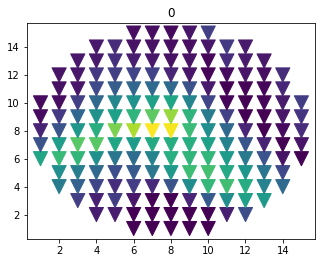

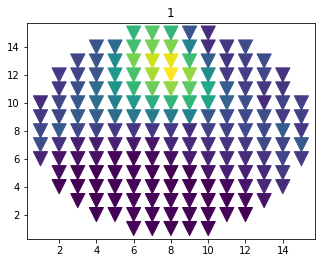

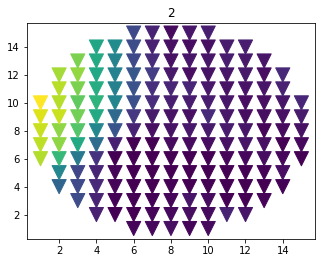

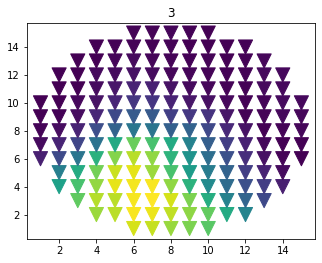

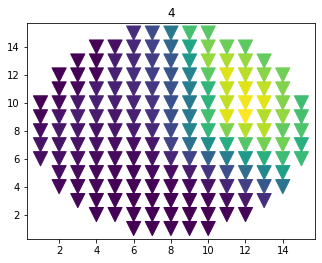

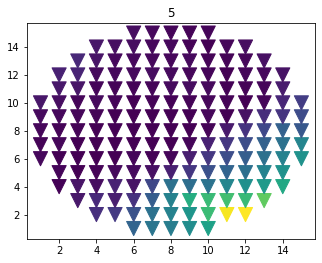

In [18]:
X=[]
Y=[]
for i in range(1,178):
    x,y=dataGrid.coord(i)
    #X.append(x)
    #Y.append(y)
    new_grid=dataGrid.grid_num(16-x,y)
    new_x,new_y=dataGrid.coord(new_grid)
    X.append(new_x)
    Y.append(new_y)
    
for val in range(0,len(H)):
    ax=plt.figure(figsize=(4,3)).add_axes([0,0,1,1])
    #ax=fig.add_axes([0,0,1,1])
    colors = H[val]/np.sum(H[val])
    ax.scatter(X,Y, c=colors, marker='v', s=200)
    ax.set_title(str(val))

In [17]:
X

[10,
 9,
 8,
 7,
 6,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 10,
 9,
 8,
 7,
 6]

# Use most abundant cluster to plot wafer map

In [10]:
#Use just the most abundant cluster to get the wafer map
labels = []
for val in range(0,177):
    b = list(H[:,val])
    labels.append(b.index(max(b)))


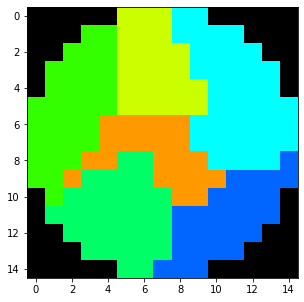

In [11]:
#This part of the code is a savior
new_labels=[None]*177
for ii in range(0,177):
    x,y=dataGrid.coord(ii+1)
    new_grid=dataGrid.grid_num(16-x,y)
    new_labels[new_grid-1]=labels[ii]

hues = [float(float(x)/float(10)) for x in range(1,10)]
cluster_grid = np.zeros(shape = (15,15,3))
for val in range(1,178):
    x,y = dataGrid.coord(val)
    cluster = new_labels[val-1]
    cluster_grid[15-y][x-1] = matplotlib.colors.hsv_to_rgb([hues[cluster],1,1])
    

fig = plt.figure()
fig.tight_layout()
plt.imshow(cluster_grid)
#ax.invert_yaxis()
ax.axis("off")

k=.03
plt.subplots_adjust(left=k,right=(1-k),bottom=k,top=(1-k),wspace=k,hspace=k)

In [19]:
b = list(H[:,0])
b.index(list(np.sort(H[:,0]))[-1])
b.index(max(b))

3

In [20]:
b = list(H[:,7])
p = b.index(max(b))
type(p)

int

In [21]:
b=list(H[:,0])
b.index(H[4,0])

4

In [22]:
#Just trying smth
a = [10, 16, 29, 1, 4, 5, 7, 9, 13, 15]
N = 3


b = a[:]
locations = []
minimum = min(b) 
for i in range(N):
    maxIndex = b.index(max(b))
    locations.append(maxIndex)
    b[maxIndex] = minimum

print(locations)

[2, 1, 9]


In [23]:
#Reshape H cutting off those clusters contributing below a threshold

H_reshape = np.zeros(shape=(len(H),177))

for j in range(0,177):
    p = H[:,j]/np.sum(H[:,j])
    for i in range(len(p)):
        if p[i]<0.2:
            p[i]=0
    H_reshape[:,j]=p
    
H_reshape[:,1]

array([0.       , 0.       , 0.       , 0.4566896, 0.3445119, 0.       ,
       0.       , 0.       , 0.       , 0.       ])

In [24]:
H_reshape[:,0]

array([0.        , 0.        , 0.        , 0.38730385, 0.35616634,
       0.        , 0.        , 0.        , 0.        , 0.22627424])

In [25]:
#Reshape the H where the 3 most abundant clusters remain for each datapoint/dot

Big_locations=[]
H_reshaped = np.zeros(shape=(10,177))         
            
for j in range(0,177):            
    b = list(H_reshape[:,j])
    locations = []
    minimum = min(b)
    for i in range(3):
        maxIndex = b.index(max(b))
        if max(b)==0:
            maxIndex=0
            continue
        locations.append(maxIndex)
        b[maxIndex] = minimum
        H_reshaped[maxIndex,j]=H_reshape[maxIndex,j]
    
    Big_locations.append(locations)
    print(locations,j)



[3, 4, 9] 0
[3, 4] 1
[3, 4] 2
[3] 3
[3] 4
[4, 9] 5
[4, 9] 6
[4, 9, 3] 7
[4, 3] 8
[3, 4] 9
[3, 4] 10
[3, 4] 11
[3, 4] 12
[3, 4] 13
[4, 0] 14
[4, 0] 15
[4] 16
[4, 9] 17
[4] 18
[4, 3] 19
[3, 4] 20
[3, 4] 21
[4, 3] 22
[4, 3] 23
[4, 3] 24
[6, 0] 25
[0, 4] 26
[4, 0] 27
[4] 28
[4, 3] 29
[4, 3] 30
[4, 3] 31
[4, 3] 32
[3, 4] 33
[4, 3] 34
[4, 3] 35
[4, 3] 36
[3, 4] 37
[6] 38
[2] 39
[4] 40
[4] 41
[4] 42
[4, 3] 43
[4, 3] 44
[4, 3] 45
[4, 3] 46
[4, 3] 47
[3, 4] 48
[3, 4] 49
[3] 50
[6] 51
[6, 2] 52
[6, 2] 53
[2, 1] 54
[4, 2] 55
[4] 56
[4] 57
[4, 3] 58
[4, 3] 59
[4, 3] 60
[3, 4] 61
[3, 4] 62
[3] 63
[3, 7, 5] 64
[7, 5, 3] 65
[6] 66
[6, 2] 67
[6, 2] 68
[2, 6] 69
[2, 4, 1] 70
[4] 71
[4] 72
[4, 3] 73
[3, 4] 74
[3, 4] 75
[3, 4] 76
[3, 5] 77
[3, 5, 7] 78
[7, 5, 3] 79
[7] 80
[6, 2] 81
[6] 82
[6, 2] 83
[6, 2] 84
[2, 1] 85
[2, 4] 86
[4] 87
[5, 3] 88
[3, 5] 89
[3, 5] 90
[3, 5] 91
[3, 5] 92
[7, 3] 93
[7] 94
[7] 95
[6, 2] 96
[6, 2] 97
[6, 2] 98
[6, 2] 99
[2, 1] 100
[6] 101
[8, 5] 102
[5, 8] 103
[3, 5, 8] 104
[3,

In [26]:
H_reshape[:,176]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.26352862, 0.        , 0.42074343, 0.        ])

In [27]:
np.shape(Big_locations)

(177,)

In [28]:
oo=1
for j in range(0,177):
    pp = [i for i,v in enumerate(H_reshaped[:,j]) if v!=0]
    if len(pp)==2:
        print(pp,j)
        oo+=1

[3, 4] 1
[3, 4] 2
[4, 9] 5
[4, 9] 6
[3, 4] 8
[3, 4] 9
[3, 4] 10
[3, 4] 11
[3, 4] 12
[3, 4] 13
[0, 4] 14
[0, 4] 15
[4, 9] 17
[3, 4] 19
[3, 4] 20
[3, 4] 21
[3, 4] 22
[3, 4] 23
[3, 4] 24
[0, 6] 25
[0, 4] 26
[0, 4] 27
[3, 4] 29
[3, 4] 30
[3, 4] 31
[3, 4] 32
[3, 4] 33
[3, 4] 34
[3, 4] 35
[3, 4] 36
[3, 4] 37
[3, 4] 43
[3, 4] 44
[3, 4] 45
[3, 4] 46
[3, 4] 47
[3, 4] 48
[3, 4] 49
[2, 6] 52
[2, 6] 53
[1, 2] 54
[2, 4] 55
[3, 4] 58
[3, 4] 59
[3, 4] 60
[3, 4] 61
[3, 4] 62
[2, 6] 67
[2, 6] 68
[2, 6] 69
[3, 4] 73
[3, 4] 74
[3, 4] 75
[3, 4] 76
[3, 5] 77
[2, 6] 81
[2, 6] 83
[2, 6] 84
[1, 2] 85
[2, 4] 86
[3, 5] 88
[3, 5] 89
[3, 5] 90
[3, 5] 91
[3, 5] 92
[3, 7] 93
[2, 6] 96
[2, 6] 97
[2, 6] 98
[2, 6] 99
[1, 2] 100
[5, 8] 102
[5, 8] 103
[3, 8] 105
[2, 6] 111
[2, 6] 112
[2, 6] 113
[6, 8] 116
[7, 8] 122
[2, 6] 126
[2, 6] 127
[2, 6] 128
[6, 8] 130
[6, 8] 131
[7, 8] 136
[7, 8] 137
[2, 6] 139
[2, 6] 140
[2, 6] 141
[1, 6] 143
[6, 8] 144
[6, 8] 145
[7, 8] 149
[7, 8] 150
[2, 6] 152
[2, 6] 153
[1, 2] 154
[1, 6] 15

In [29]:
H[Big_locations[1],1]

array([15.77694148, 11.90161545])

In [30]:
H_reshaped[3,1]

0.45668960179323126

In [31]:
Big_locations[1]

[3, 4]

In [40]:
print(".................There are %d clusters in total..........." %5)  

.................There are 5 clusters in total...........


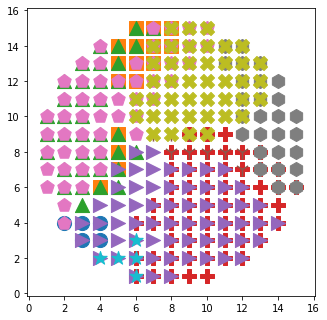

In [32]:
# Plot the wafer map

X=[]
Y=[]
for i in range(1,178):
    x,y=dataGrid.coord(i)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

mmm = []
for i in range(0,10):
    mm = [i for i,v in enumerate(H_reshaped[i]) if v!=0]
    mmm.append(mm)
    
ax=plt.figure(figsize=(4,4))
ax=ax.add_axes([0,0,1,1])
markers = ["o","s","^","P",">","1","p","h","X","*"]
for val in range(0,10):
    #ax=fig.add_axes([0,0,1,1])
    #colors = H[val]/max(H[val])
    X_new = X[mmm[val]]
    Y_new = Y[mmm[val]]
    #colors=H_reshaped[val][mmm[val]]
    ax.scatter(X_new,Y_new, marker=markers[val],s=200)
    ax.invert_yaxis()


In [51]:
np.transpose(X)

array([ 6,  7,  8,  9, 10,  4,  5,  6,  7,  8,  9, 10, 11, 12,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 15,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  6,  7,  8,  9, 10])

In [33]:
'''
for val in range(0,10):
    ax=plt.figure().add_axes([0,0,1,1])
    #ax=fig.add_axes([0,0,1,1])
    #colors = H[val]/max(H[val])
    colors=H_reshaped[val]
    

    ax.scatter(X,Y, c=colors, marker='o')
    
plt.show()
'''

"\nfor val in range(0,10):\n    ax=plt.figure().add_axes([0,0,1,1])\n    #ax=fig.add_axes([0,0,1,1])\n    #colors = H[val]/max(H[val])\n    colors=H_reshaped[val]\n    \n\n    ax.scatter(X,Y, c=colors, marker='o')\n    \nplt.show()\n"

In [34]:
find_peaks?

Object `find_peaks` not found.


In [35]:
H[:,0]

array([ 0.        ,  0.        ,  0.26917899, 12.93615953, 11.89614998,
        0.31404968,  0.        ,  0.10757802,  0.31974592,  7.5576828 ])